<a href="https://colab.research.google.com/github/BlancaCC/Computer-vision/blob/p1/practica_0/Pr%C3%A1ctica_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 0 
Blanca Cano Camarero DGIIM

Toda esta práctica será realizada con opencv de python luego será necesario importar la biblioteca respectiva. 

In [7]:
import cv2
import numpy as np

# Rutas posibles
colab =  '/content/drive/MyDrive/Visión por computador/práctica 0/images/'
local = './images/'
ruta_actual = colab

# Path de las imágenes 
path_dave = ruta_actual +'dave.jpg'
path_messi = ruta_actual + 'messi.jpg'
path_orapple = ruta_actual +'orapple.jpg'
path_logo = ruta_actual +'logoOpenCV.jpg'

todas_imagenes = [path_dave, path_logo, path_messi, path_orapple]

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Ejercicio** 1
Escribir una función que lea el fichero de una imagen y permita mostrarla
tanto en grises como en color (im=leeimagen(filename, flagColor)).
flagColor es la variable que determina si la imagen se muestra en escala
de grises o en color.

### Explicación de la solución  
Usaremos la función propia de cv2 imread. 
`imread(path, flag)`, que muestra el path de la imagen y flag el método en que la variable será leída.  

Los flags que nos van a ser útiles son:  
- `cv2.IMREAD_COLOR` para color 
- `cv2.IMREAD_GRAYSCALE` Modo de escala de grises. 

Recursos utilizados (fecha de consulta 24/09/21): 

![Geekforgeek](https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/)


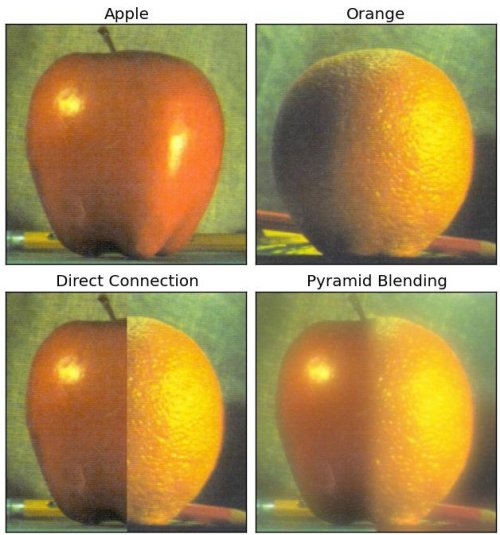

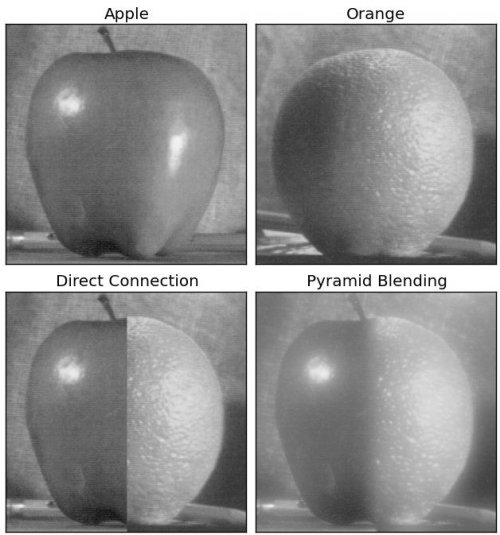

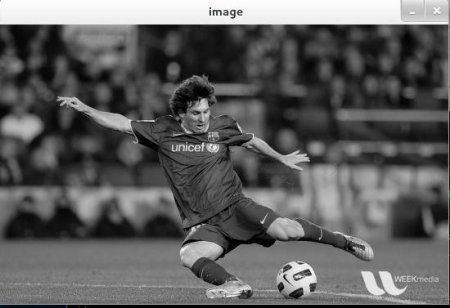

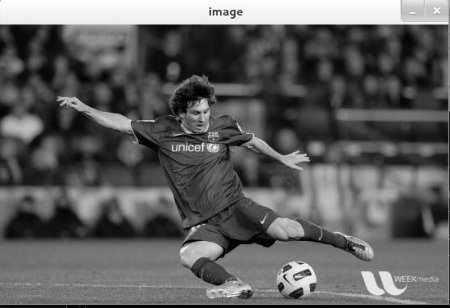

In [5]:
def leeImagen(filename, flagColor):
  '''
  @param filename: nombre de la foto 
  @para flagColor: boolean escala de grises o color
  '''
  return cv2.imread(filename, flagColor)

## Ejemplos de uso de la función 
from google.colab.patches import cv2_imshow # for image display
flagColor = cv2.IMREAD_ANYCOLOR
flagGrey = cv2.IMREAD_GRAYSCALE

#orapple 
img_orapple_color = leeImagen(path_orapple, flagColor) 
cv2_imshow(img_orapple_color)
img_orapple_gris = leeImagen(path_orapple, flagGrey)
cv2_imshow(img_orapple_gris)
# messi
img_messi_color = leeImagen(path_messi, flagColor) # como vemos si la imagen está en blanco y negro no le afecta
cv2_imshow(img_messi_color)
img_messi_gris = leeImagen(path_messi, flagGrey)
cv2_imshow(img_messi_gris)

## Crearemos imagen del resto para el resto de path
imagenes_color = list(map( lambda img : leeImagen( img, flagColor), todas_imagenes))
imagenes_gris = list(map( lambda img : leeImagen( img, flagGrey), todas_imagenes))


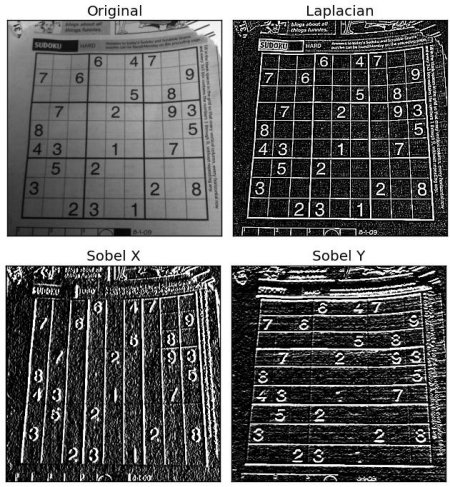

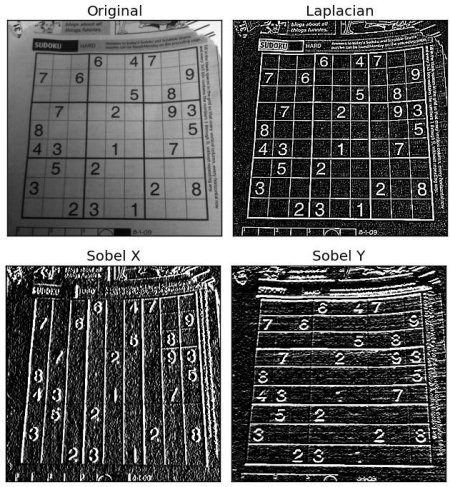

In [ ]:

## 

## Ejercicio 2

Escribir una función que permita visualizar una matriz de números reales
cualquiera/arbitraria, tanto monobanda como tribanda (pintaI(im)). Para
ello se deberá escalar el rango de cada banda al intervalo [0,1] sin pérdida
de información.

### Explicación    

Vamos a mostrarlo con la biblioteca de mathplotlib

Otra opción (implementada en pintaI2
la función `cv2.imshow` no es posible usarla en colab, luego hemos usado una alternativa proporcionada por google 
Hemos usado este ejemplo
https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb#scrollTo=6dy-iP-VTib

In [16]:
import matplotlib.pyplot as plt
import numpy as np
def pintaI(imagen, titulo=""):
    plt.title(titulo)
    # si la imagen es tribanda, tenemos que invertir los canales B y R
    # si es en blanco y negro, tenemos que decirle a matplotlib que es monobanda
    if imagen.ndim == 3 and imagen.shape[2] >= 3:
        plt.imshow(imagen[:,:,::-1])
    else:
        plt.imshow(imagen, cmap='gray')
    plt.show()


def pintaI2(im, titulo = "Imagen"):
  """Visualiza una matriz de números reales cualquiera
     - im: Imagen a visualizar"""

  cv2_imshow(im)

## Ejemplo colores 
pintaI (img_color, 'Matriz en color')
pintaI(img_gris)
print('Versión hecha con la funciíon cv2_imshow')
print ('Versión en color')
pintaI2 (img_color)
print('Versión en escala de grises')
pintaI2(img_gris)

NameError: ignored

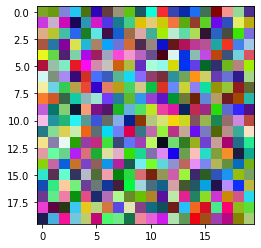

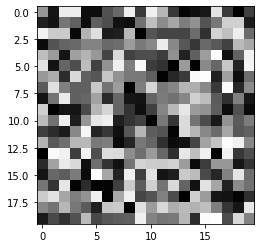

In [ ]:
# Ejemplo de la matriz aleatoria 
# La escala iría en el intervali  [0,1] por ello no se ha cambiado la escala
imagen_messi = '/content/drive/MyDrive/Visión por computador/práctica 0/images/messi.jpg'
random_img_color = np.random.rand(20, 20, 3)
random_img_gray = np.random.rand(20,20)
img = cv2.imread( imagen_messi, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pintaI(random_img_color)
pintaI(random_img_gray)


## Ejercicio 3
Escribir una función que visualice varias imágenes distintas a la vez
(concatenando las imágenes en una última imagen final 1 ): pintaMI(vim).
(vim será una secuencia de imágenes) ¿Qué pasa si las imágenes no son
todas del mismo tipo?

### Descripción 

Pretendemos visualizar varias imágenes concatenadas. 
La descripción general del algoritmo es:
1. Criterio para manejar las que estén en color y las que no.
2. Ajustar tamaño
3. Concatenat. 

La soluciones aportadas:
1. Se pasan todas a color.
2. Deben de ser del mismo tamaño: hemos optado por agrandar hasta el tamaño de la mayor. Se añadirán border si fuera necesario utilizando: `copyMakeBorder`. 
3. Cancotenamos las sucesivas imágenes. 

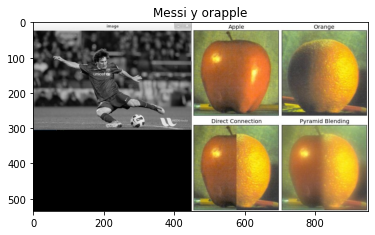

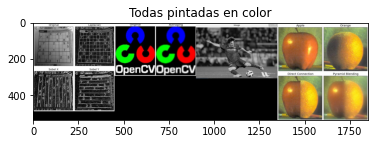

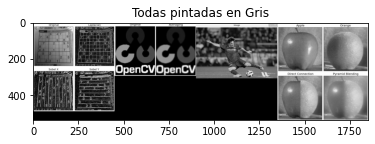

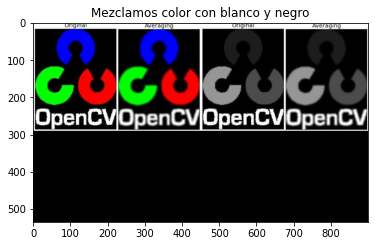

In [13]:
# Funciones auxiliares
def isBW(im):
  """Indica si una imagen está en blanco y negro"""
  return len(im.shape) == 2

# Función principal 
def pintaMI (vim, titulo= "Imágenes"): 
  '''Pinta múltiples imágenes
  @param vim: vector de imágenes
  @param titulo: Título de las imágenes 
  '''
  altura = max([ imagen.shape[0]for imagen in vim   ])

  for i,imagen in enumerate(vim):
    # Pasamos a color si es blanco y negro
    if isBW(imagen): # Pasar a color
      vim[i] = cv2.cvtColor(vim[i], cv2.COLOR_GRAY2BGR)

    if imagen.shape[0] < altura: # Redimensionar imágenes
      vim[i] = cv2.copyMakeBorder(
        vim[i], 0, altura - vim[i].shape[0],
        0, 0, cv2.BORDER_CONSTANT, value = (0,0,0))

  imMulti = cv2.hconcat(vim)
  pintaI(imMulti, titulo)

## Ejecución de ejemplo 
pintaMI ( [img_messi_color, img_orapple_color], 'Messi y orapple')
pintaMI(imagenes_color, 'Todas pintadas en color')
pintaMI(imagenes_gris, 'Todas pintadas en Gris')

# ¿Qué corre si mezclamos una en blanco y negro con otra en color?
pintaMI( [imagenes_color[1], imagenes_gris[1]], 'Mezclamos color con blanco y negro')
# Lo hace sin problema gracias a que lo transformamos a color

# Ejercicio 4
4. Escribir una función que modifique el color en la imagen de cada uno de
los elementos de una lista de coordenadas de píxeles 2 . En concreto, los
alumnos deben insertar un cuadrado azul de 100x100 pixeles en el centro
de la imagen a modificar.

## Descripción general del procedimiento

Dado que las imágenes no dejan de ser matrices, cambiaremos el color de las entradas pedidas. 
La función `CambiaPixeles` permite cambiar el color de píxeles de la lista de manera genérica. 
`InsertaCuadradoAzul` es la función que resuleve nuestro problema. 


In [15]:
def CambiaPixeles ( imagen, pixeles, color):
  '''
    imagen: imagen a cambiar
    pixeles: lista de píxeles que se desean cambiar
    colores: lista de colores, el color i-ésimo se corresponde al del pixel i-ésimo de la lista de píxeles. 
  '''
  imagen_nueva = np.copy(imagen)
  # mejor copiarla y devolver la copiada!!!
  # si la imagen es gris 
  if len(imagen_nueva.shape) != 3: 
    color = color[0] 
  for (x,y) in pixeles: 
    imagen_nueva[(x,y)] = color
    
  return imagen_nueva



def InsertarCuadradoAzul (imagen): 
  tam_cuadrado = 100 # numero de pixeles de lado que tendrá el cuadrado
  # color azul en RGB
  color_azul = np.array([0,0,1], np.float64) 

  # cálculo de coordenadas
  x_inicial = (imagen.shape[0]-tam_cuadrado)//2
  x_final = x_inicial + tam_cuadrado
  y_inicial = (imagen.shape [1]- tam_cuadrado)//2
  y_final = y_inicial + tam_cuadrado

  pixeles = [(x,y) for x in range(x_inicial, x_final) 
    for y in range(y_inicial, y_final)]
 
  imagenConCuadrado = CambiaPixeles(imagen, pixeles, color_azul)
  return imagenConCuadrado

messiCuadrado = InsertarCuadradoAzul(img_messi_color)
pintaMI(messiCuadrado)

ValueError: ignored